# Plotting Multiple Data Series

Complete the following set of exercises to solidify your knowledge of plotting multiple data series with pandas, matplotlib, and seaborn. Part of the challenge that comes with plotting multiple data series is transforming the data into the form needed to visualize it like you want. For some of the exercises in this lab, you will need to transform the data into the form most appropriate for generating the visualization and then create the plot.

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [14]:
data = pd.read_csv('../data/liquor_store_sales.csv')
data.head()

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.0,1.0,0.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.0,1.0,0.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,8.0,0.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.0,2.0,0.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.0,4.0,0.0


## 1. Create a bar chart with bars for total Retail Sales, Retail Transfers, and Warehouse Sales by Item Type.

In [59]:
data_sum = data[['RetailSales', 'RetailTransfers', 'WarehouseSales']].groupby(data['ItemType']).agg('sum')
data_sum

,RetailSales,RetailTransfers,WarehouseSales
ItemType,,,
BEER,209763.11,234924.44,2437617.32
DUNNAGE,0.00,0.00,-45331.00
KEGS,0.00,0.00,43558.00
LIQUOR,309847.85,334176.41,33173.32
NON-ALCOHOL,8109.97,9058.37,8656.72
REF,281.34,171.92,-6754.00
STR_SUPPLIES,995.98,3594.70,0.00
WINE,313400.42,340710.51,433009.47


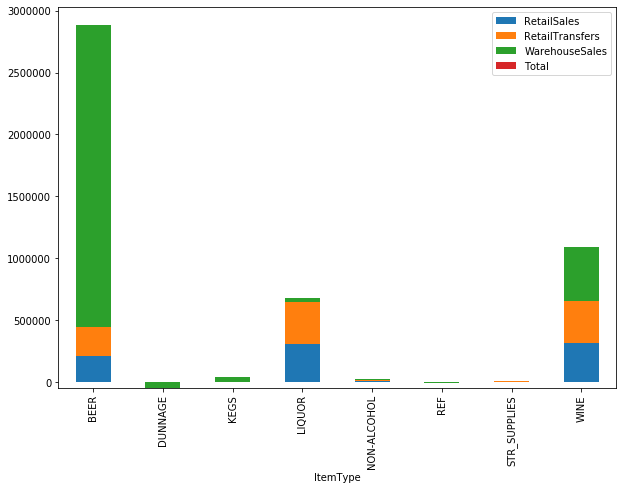

In [113]:
data_sum.plot.bar(stacked=True, figsize=[10,7])

## 2. Create a horizontal bar chart showing sales mix for the top 10 suppliers with the most total sales. 

In [67]:
rs_total = data['RetailSales'].groupby(data['Supplier']).sum()
rt_total = data['RetailTransfers'].groupby(data['Supplier']).sum()
ws_total = data['WarehouseSales'].groupby(data['Supplier']).sum()

In [72]:
total_sales = rs_total + rt_total + ws_total
total_sales

Supplier
8 VINI INC                        5.78
A HARDY USA LTD                   0.40
A I G WINE & SPIRITS            152.44
A VINTNERS SELECTIONS         46778.34
A&E INC                          13.52
                                ...   
WINEBOW INC                      -0.34
YOUNG WON TRADING INC          4634.95
YUENGLING BREWERY             74284.84
Z WINE GALLERY IMPORTS LLC       36.08
ZURENA LLC                       36.82
Length: 333, dtype: float64

In [87]:
top10_suppliers = total_sales.sort_values(ascending=False).head(10)
top10_suppliers

Supplier
MILLER BREWING COMPANY      646822.71
CROWN IMPORTS               636094.20
ANHEUSER BUSCH INC          583737.97
HEINEKEN USA                362740.01
E & J GALLO WINERY          218180.45
DIAGEO NORTH AMERICA INC    174877.36
CONSTELLATION BRANDS        159983.37
JIM BEAM BRANDS CO           85105.83
THE WINE GROUP               80823.98
BOSTON BEER CORPORATION      76064.12
dtype: float64

In [88]:
top10_suppliers.keys()

Index(['MILLER BREWING COMPANY', 'CROWN IMPORTS', 'ANHEUSER BUSCH INC',
       'HEINEKEN USA', 'E & J GALLO WINERY', 'DIAGEO NORTH AMERICA INC',
       'CONSTELLATION BRANDS', 'JIM BEAM BRANDS CO', 'THE WINE GROUP',
       'BOSTON BEER CORPORATION'],
      dtype='object', name='Supplier')

In [91]:
sales_mix = data[['RetailSales', 'RetailTransfers', 'WarehouseSales']].groupby(top10_suppliers.keys()).agg('sum')
sales_mix.plot.barh(figsize=[10,7])

#stacked=True

ValueError: Grouper and axis must be same length

## 3. Create a multi-line chart that shows average Retail Sales, Retail Transfers, and Warehouse Sales per month over time.

In [117]:
data_mean_month = data[['Year', 'Month', 'RetailSales', 'RetailTransfers', 'WarehouseSales']].groupby(data['Year', 'Month']).agg('mean')

KeyError: ('Year', 'Month')

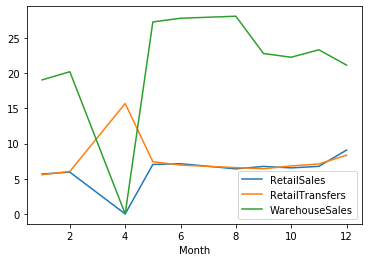

In [112]:
data_mean_month.plot()

## 4. Plot the same information as above but as a bar chart.

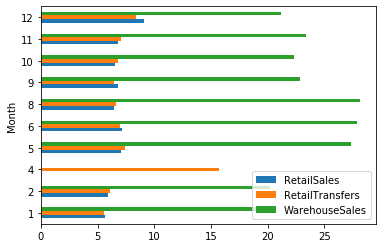

In [114]:
data_mean_month.plot.barh()

## 5. Create a multi-line chart that shows Retail Sales summed by Item Type over time (Year & Month).

*Hint: There should be a line representing each Item Type.*

In [110]:
data.sort_values(by=['RetailSales'])
data.plot(x=data['Month'], y=data['RetailSales'].groupby(data['ItemType']).sum())

KeyError: "None of [Int64Index([4, 4, 4, 4, 4, 4, 4, 4, 4, 4,\n            ...\n            2, 2, 2, 2, 2, 2, 2, 2, 2, 2],\n           dtype='int64', length=128355)] are in the [columns]"

## 6. Plot the same information as above but as a bar chart.

## 7. Create a scatter plot showing the relationship between Retail Sales (x-axis) and Retail Transfers (y-axis) with the plot points color-coded according to their Item Type.

*Hint: Seaborn's lmplot is the easiest way to generate the scatter plot.*

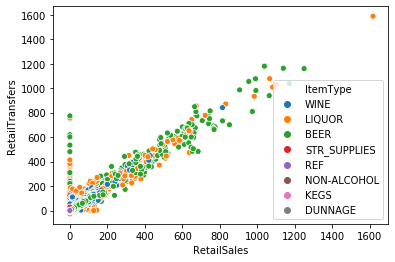

In [46]:
sns.scatterplot(x="RetailSales", y="RetailTransfers", hue="ItemType", data=data)

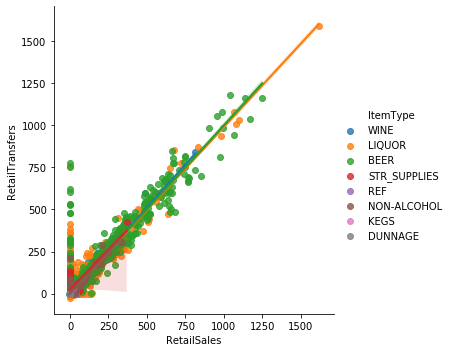

In [49]:
sns.lmplot(x="RetailSales", y="RetailTransfers", data=data, hue="ItemType", legend=True, scatter=True)

## 8. Create a scatter matrix using all the numeric fields in the data set with the plot points color-coded by Item Type.

*Hint: Seaborn's pairplot may be your best option here.*

In [52]:
data.select_dtypes(np.number)

,Year,Month,RetailSales,RetailTransfers,WarehouseSales
0,2017,4,0.00,1.0,0.0
1,2017,4,0.00,1.0,0.0
2,2017,4,0.00,8.0,0.0
3,2017,4,0.00,2.0,0.0
4,2017,4,0.00,4.0,0.0
...,...,...,...,...,...
128350,2018,2,66.46,59.0,212.0
128351,2018,2,9.08,7.0,35.0
128352,2018,2,0.00,0.0,32.0
128353,2018,2,0.00,0.0,-35.0


RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

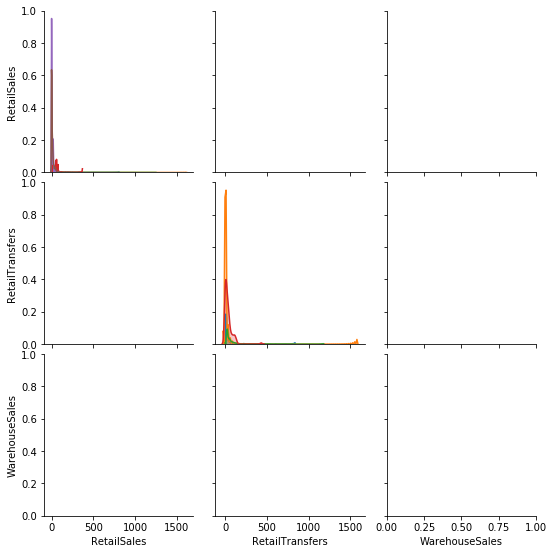

In [56]:
sns.pairplot(data, kind='scatter', vars=['RetailSales', 'RetailTransfers', 'WarehouseSales'], hue='ItemType')